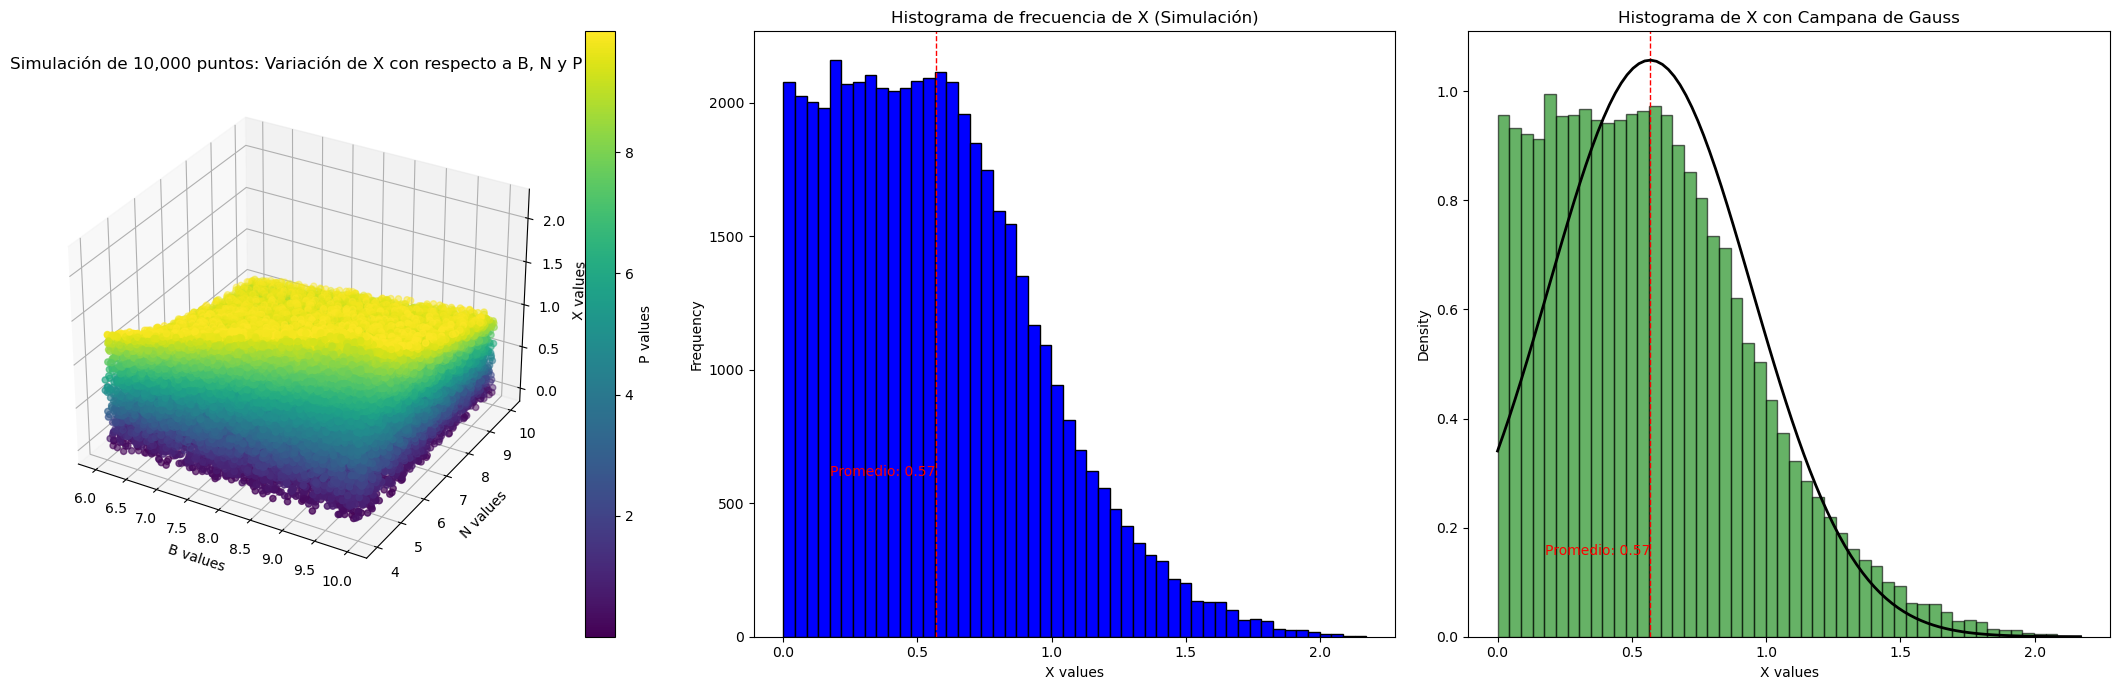

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm

def calc(b, p, n):
    x = (b * p) / ((n + 0.5) * 10)
    return x


num_points = 10000

# Inicializar arrays para B, N, P y X
B = np.zeros(num_points)
N = np.zeros(num_points)
P = np.zeros(num_points)
X = np.zeros(num_points)

# Usar un bucle for para generar valores aleatorios y calcular X
for i in range(num_points):
    B[i] = random.uniform(6, 10)
    N[i] = random.uniform(4, 10)
    P[i] = random.uniform(0, 10)
    X[i] = calc(B[i], P[i], N[i])

# Calcular el promedio de X
average_X = np.mean(X)

# Crear el histograma ideal y calcular la campana de Gauss
mu, std = norm.fit(X)  # Media y desviación estándar de los datos simulados
xmin, xmax = min(X), max(X)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Crear los gráficos
fig = plt.figure(figsize=(21, 7))

# Subplot 1: Gráfico de dispersión 3D
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(B, N, X, c=P, cmap='viridis', marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('P values')
ax1.set_xlabel('B values')
ax1.set_ylabel('N values')
ax1.set_zlabel('X values')
ax1.set_title('Simulación de 10,000 puntos: Variación de X con respecto a B, N y P')

# Subplot 2: Histograma de frecuencia de X obtenido de la simulación
ax2 = fig.add_subplot(132)
ax2.hist(X, bins=50, color='blue', edgecolor='black')
ax2.axvline(average_X, color='red', linestyle='dashed', linewidth=1)
ax2.text(average_X, 600, f'Promedio: {average_X:.2f}', color='red', ha='right')
ax2.set_xlabel('X values')
ax2.set_ylabel('Frequency')
ax2.set_title('Histograma de frecuencia de X (Simulación)')

# Subplot 3: Histograma de frecuencia de X con campana de Gauss
ax3 = fig.add_subplot(133)
ax3.hist(X, bins=50, color='green', edgecolor='black', density=True, alpha=0.6)
ax3.axvline(average_X, color='red', linestyle='dashed', linewidth=1)
ax3.text(average_X, 0.15, f'Promedio: {average_X:.2f}', color='red', ha='right')
ax3.plot(x, p, 'k', linewidth=2)
ax3.set_xlabel('X values')
ax3.set_ylabel('Density')
ax3.set_title('Histograma de X con Campana de Gauss')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
